***
# <font color=lightblue size=10>Regressão Logística</font>
***

INTRODUÇÃO SOBRE A AULA
.
.
.
* https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# 1.0 IMPORTANDO BIBLIOTECAS



In [54]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

import io

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 16})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.0. FUNÇÕES

Prezamos por seu entendimento sobre o tema, logo, algumas funções foram criadas para você. Como um bônus, você poderá analisar a estrutura do código criado e customizar suas próprias funções.

## 2.1. Visualização

In [ ]:
# 

## 2.2. Download de arquivos

In [ ]:
def download_file(name):
    file = name + '.png'
    plt.savefig(file)
    files.download(file) 

# 3.0. EXTRAÇÃO

##  3.1. Dataframe

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
DATA_DIR = '/content/drive/MyDrive/[Curso] - EAD na Saúde/10_Regressão Logística/data/cardioV2.csv'

In [4]:
# criando o dataframe
# df = pd.read_csv(io.BytesIO(uploaded['cardio.csv']), index_col=[0], sep=';')
df = pd.read_csv(DATA_DIR)
# visualizando o cabeçalho e printando algumas informações
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])

df.head()

# rename ap_s e ap_lo

Linhas:  68768
Colunas:  68768


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Informações sobre cada coluna:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

cardio: [Positivo (1) / Negativo (0)]

Sabemos que em aplicações reais, as planilhas estão submetidas a erros, o que pode ocasionar futuros problemas ao avaliar corretamente os dados. Vamos analisar se há arquivos do tipo NaN ou duplicatas no dataframe.


Arquivos NaN:

In [5]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.isna().sum()
# Apague o comentário e e comece aqui:

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Duplicatas:

In [6]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.duplicated().sum()
# Apague o comentário e e comece aqui:

0

alterando a idade para anos

In [7]:
# np.floor irá arredondar os valores
df['age'] = np.floor(df['age'] / 365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68763,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
68764,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
68765,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
68766,99998,61,1,163,72.0,135,80,1,2,0,0,0,1



## 3.2. Análises Exploratória dos Dados

### Variáveis quantitativas

#### Relação entre idade e pacientes saudáveis e cardíacos

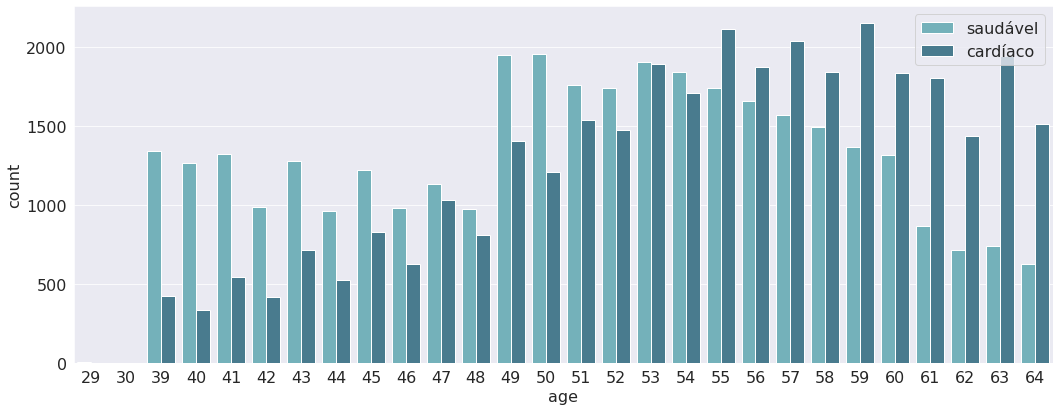

In [55]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.countplot(x='age', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
plt.tight_layout()

✅ A partir dos 53 anos as pessoas já tendem a ter complicações. Aos 55 anos os pacientes cardíacos torna-se predominante.

Além de visualizarmos apenas a distribuição, vamos criar boxplots com as variáveis do dataframe. Dessa forma podemos ter uma melhor noção sobre os extremos, os quartis e a mediana de cada coluna do dataframe - com esses valores nós podemos identificar certos comportamentos anômalos nos dados, chamados de outliers.

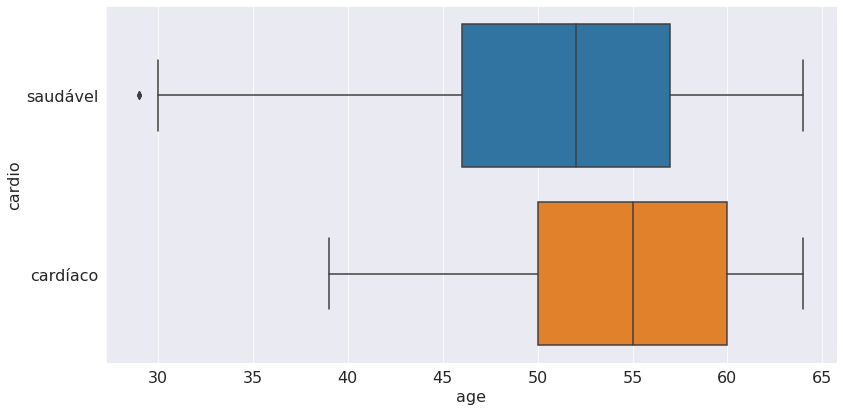

In [57]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='age', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

✅ A mediana para os cardíacos é aproximadamente 55 anos.

✅ A tendência é que 75% dos pacientes cardíacos tenham idade acima de 50 anos.

#### Relação entre pressão sanguínea e pacientes saudáveis e cardíacos

##### **PRESSÃO ALTA**

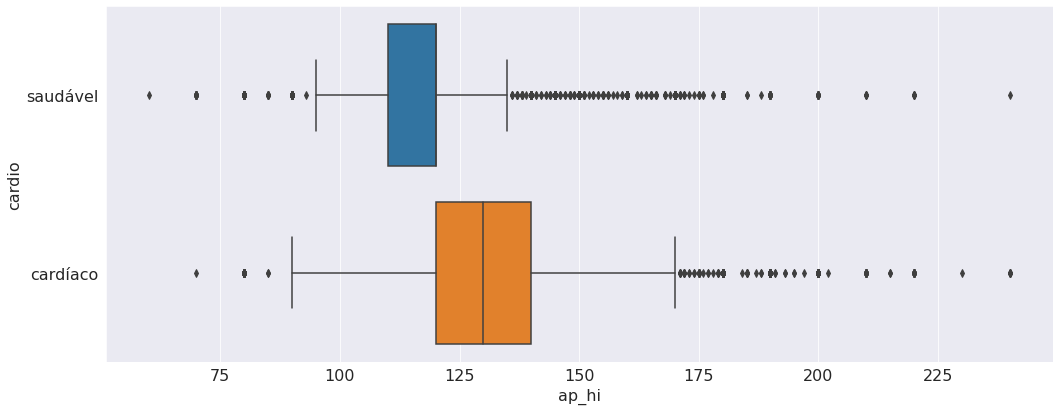

In [76]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='ap_hi', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

❗ Encontramos outliers! Vamos filtrar o valor de ap_hi para menor que 200 e avalilarmos novamente o boxplot. Para isso, utilizamos a função `df.query` do pandas e informamos que queremos 'ap_hi < 200'.

Vamos considerar valores acima dos percentis de 95% e abaixo de 2% para valores de pressão sanguínea do conjunto de dados.

In [100]:
print('98% dos valores de ap_hi estão até o valor de {}'.format(df.ap_hi.quantile(0.98)))
print('2% dos valores de ap_hi estão até o valor de {}'.format(df.ap_hi.quantile(0.02)))

98% dos valores de ap_hi estão até o valor de 170.0
2% dos valores de ap_hi estão até o valor de 100.0


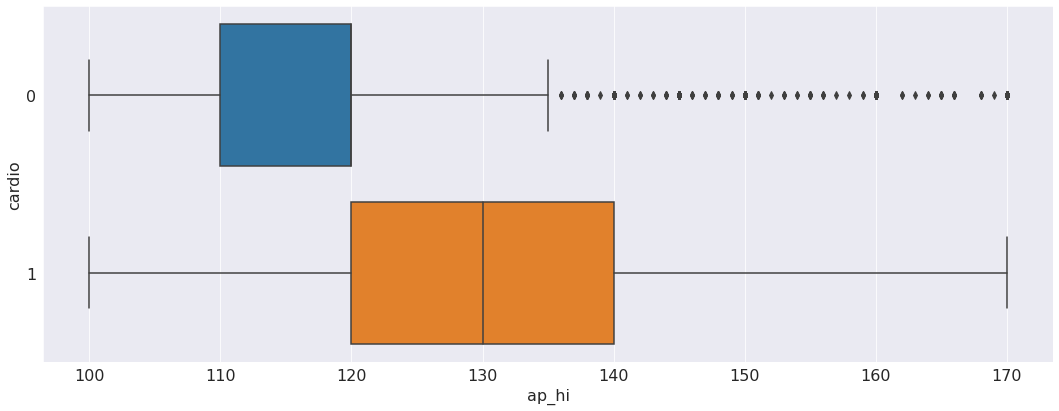

In [110]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.boxplot(x='ap_hi', y='cardio', data = df.query('(ap_hi <= 170) and (ap_hi >= 100)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

Vamos remover esses dados do dataframe original

In [128]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 66675
colunas: 13


In [129]:
# ap_hi maiores que 170 e menores que 100 serão eliminados do dataframe original
df.drop(df.query('(ap_hi > 170) | (ap_hi < 100)').index, inplace=True)

In [130]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 66675
colunas: 13


##### PRESSÃO BAIXA

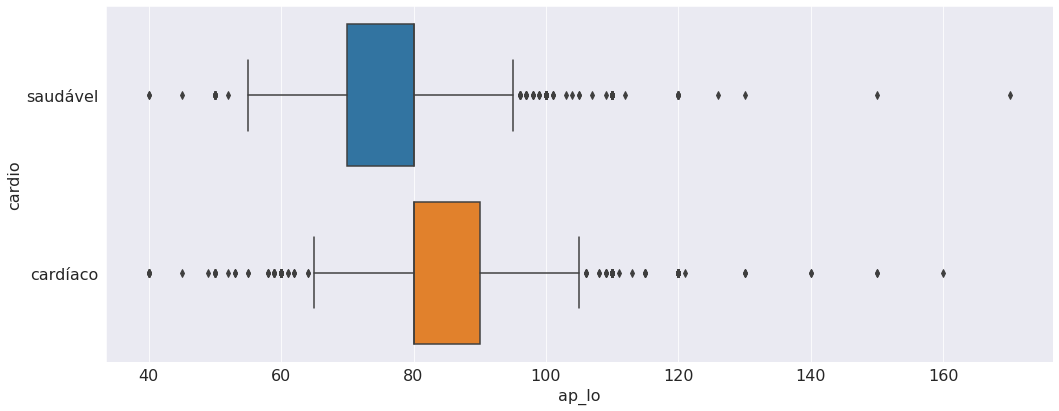

In [132]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='ap_lo', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

In [142]:
print('98% dos valores de ap_hi estão até o valor de {}'.format(df.ap_lo.quantile(0.98)))
print('2% dos valores de ap_hi estão até o valor de {}'.format(df.ap_lo.quantile(0.02)))

98% dos valores de ap_hi estão até o valor de 100.0
2% dos valores de ap_hi estão até o valor de 60.0


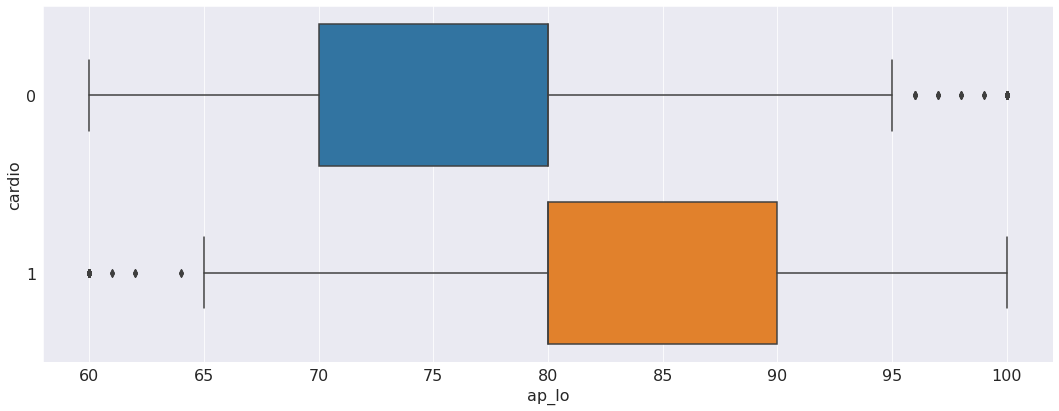

In [143]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6)a)
sns.boxplot(x='ap_lo', y='cardio', data = df.query('(ap_lo <= 100) and (ap_lo >= 60)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

In [144]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 66675
colunas: 13


In [145]:
# ap_lo maiores que 100 e menores que 60 serão eliminados do dataframe original
df.drop(df.query('(ap_lo > 100) | (ap_lo < 60)').index, inplace=True)

In [146]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 66193
colunas: 13


❕ questões extra que podem influênciar no desempenho do modelo em caso de ser colocado em produção:

1. Não temos informações sobre os medicamentos que os pacientes estão utilizando.

2. Problema cardíaco mais grave pode apresentar uma pressão mais baixa.

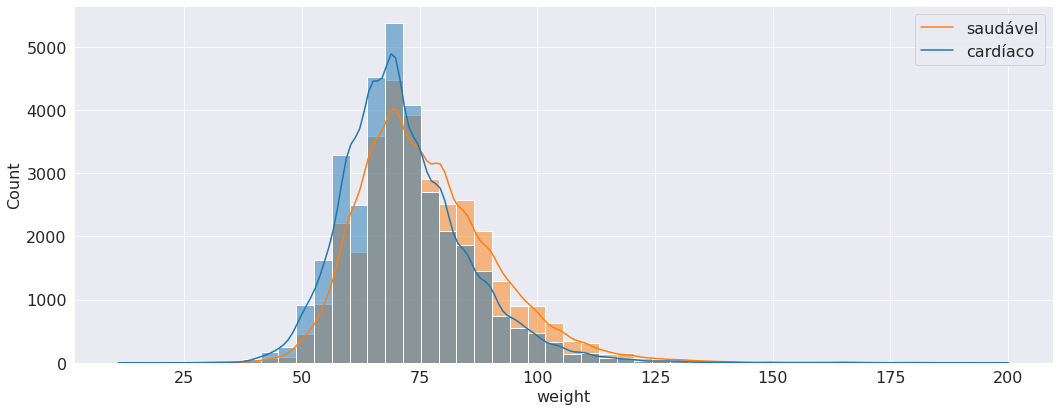

In [162]:
plt.figure(figsize=(15,6))
sns.histplot(x='weight', hue='cardio', kde=True, data = df, bins=50);
plt.legend(['saudável', 'cardíaco'])
plt.tight_layout()

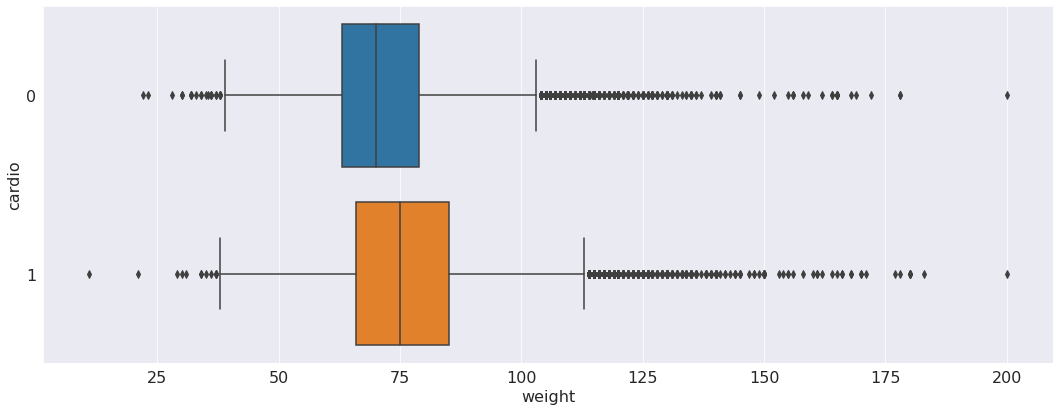

In [163]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.boxplot(x='weight', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

Percebe-se que há outliers. Podemos perceber que temos pesos com valores muito elevados e muito baixos - improváveis para a idade mínima da distribuição do conjunto de dados. Vamos seguir a mesma técnica que utlizamos anteriormente e remover essas outliers.

In [165]:
# idade mínima do dataset
df.age.min()

29

In [168]:
print('98% dos valores de weight estão até o valor de {}'.format(df.weight.quantile(0.98)))
print('2% dos valores de weight estão até o valor de {}'.format(df.weight.quantile(0.02)))

98% dos valores de weight estão até o valor de 109.0
2% dos valores de weight estão até o valor de 51.0


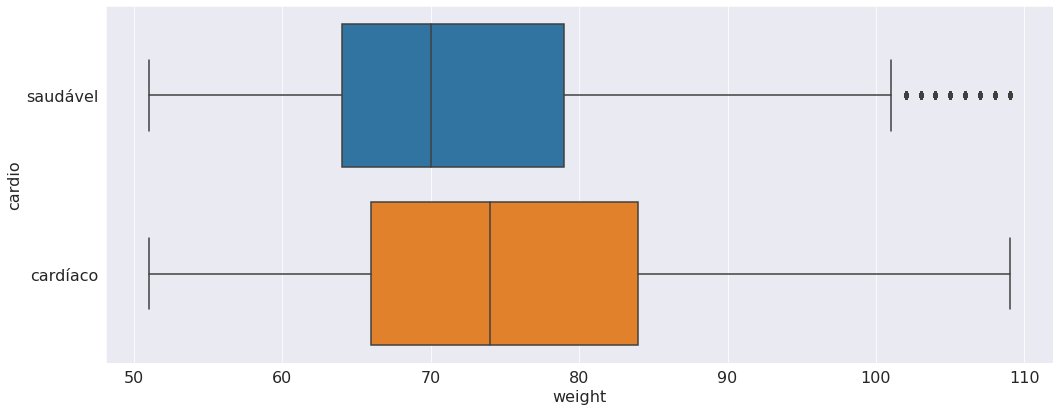

In [176]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='weight', y='cardio', data = df.query('(weight <= 109) and (weight >= 51)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'])
plt.tight_layout()

In [177]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 66193
colunas: 13


In [178]:
# ap_lo maiores que 100 e menores que 60 serão eliminados do dataframe original
df.drop(df.query('(weight > 109) | (weight < 51)').index, inplace=True)

In [179]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 63572
colunas: 13


#### Relação entre colesterol e pacientes saudáveis e cardíacos.

1: normal, 2: acima do normal, 3: bem acima do normal

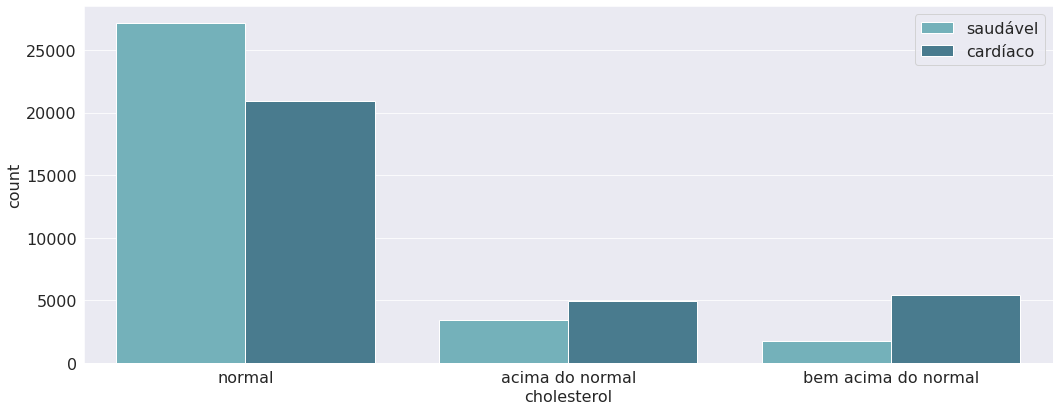

In [182]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.countplot(x='cholesterol', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
ax.set_xticklabels(['normal', 'acima do normal', 'bem acima do normal'])
plt.tight_layout()

✅ Pessoas com colesterol acima do normal tendem a apresentar problemas cardíacos.

In [185]:
df.groupby('cholesterol').count()

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,,
1,48051,48051,48051,48051,48051,48051,48051,48051,48051,48051,48051,48051
2,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373
3,7148,7148,7148,7148,7148,7148,7148,7148,7148,7148,7148,7148


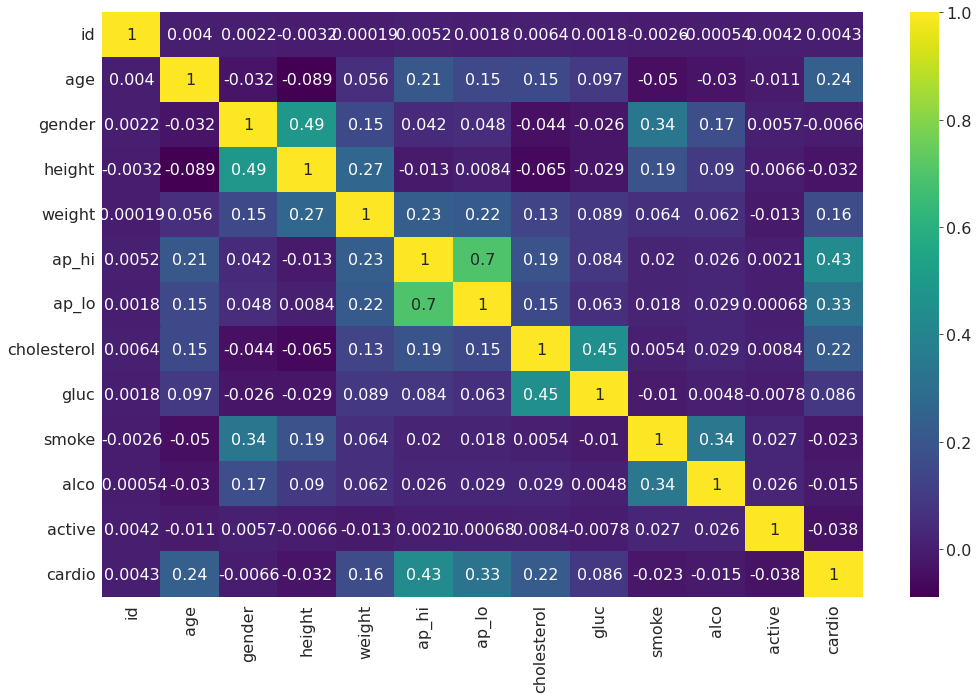

In [217]:
# correlation plot

# COMO SALVAR O GRAFICO: PILLOW
plt.figure(figsize=(15,10))
corr = df.corr()
ax = sns.heatmap(corr, cmap = 'viridis', annot= True);
plt.tight_layout()

In [ ]:
# POSSO TREINAR UM MODELO DE REGRESSÃO COM DADOS RUINS E OUTRO COM DADOS LIMPOS.

In [191]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0


In [283]:
X = df.drop(columns=['id', 'cardio' ]).to_numpy()
y = df.cardio.to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(y.shape)

(63572, 11)
(63572,)


In [284]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=10)

print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))

print('X_val shape {}'.format(X_val.shape))
print('y_val shape {}'.format(y_val.shape))

print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))


X_train shape (40685, 11)
y_train shape (40685,)
X_val shape (12715, 11)
y_val shape (12715,)
X_test shape (10172, 11)
y_test shape (10172,)


In [285]:
# instanciando a função
model = LogisticRegression(max_iter=1000)

# treinando
model.fit(X_train, y_train)

# from sklearn.metrics import mean_squared_error

print(
    'score do conjunto de treinamento: {:.2f}%'.format(
        (model.score(X_train, y_train)*100))
)

print(
    'score do conjunto de validação: {:.2f}%'.format(
        (model.score(X_val, y_val)*100))
)
print(
    'score do conjunto de Teste: {:.2f}%'.format(
        model.score(X_test, y_test)*100)
    )

print(f'número de iterações: {model.n_iter_}')

score do conjunto de treinamento: 72.03%
score do conjunto de validação: 72.47%
score do conjunto de Teste: 72.75%
número de iterações: [12]


In [286]:
results_proba = model.predict_proba(X_test)
df_proba = pd.DataFrame(
    data = results_proba,
    columns=['Negativo', 'Positivo']
)
df_proba.head()

,Negativo,Positivo
0,0.410197,0.589803
1,0.125667,0.874333
2,0.082331,0.917669
3,0.655318,0.344682
4,0.081186,0.918814


In [287]:
coeff_df = pd.DataFrame(
    {'features': df.drop(columns=['id', 'cardio' ]).columns}
    )
coeff_df['correlation'] = pd.Series(model.coef_[0])
coeff_df

,features,correlation
0,age,0.355500
1,gender,-0.012520
2,height,-0.028789
3,weight,0.137381
4,ap_hi,0.880109
5,ap_lo,0.088079
6,cholesterol,0.345790
7,gluc,-0.063944
8,smoke,-0.040596
9,alco,-0.056926


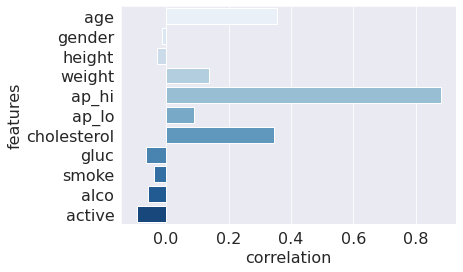

In [288]:
sns.barplot(data=coeff_df, y='features', x='correlation', palette='Blues')

In [289]:
X = df[coeff_df[coeff_df.correlation > 0].features.values]
y = df.cardio

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(y.shape)


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=10)

print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))

print('X_val shape {}'.format(X_val.shape))
print('y_val shape {}'.format(y_val.shape))

print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

# instanciando a função
model = LogisticRegression(C=1e10, max_iter=1000)

# treinando
model.fit(X_train, y_train)

# from sklearn.metrics import mean_squared_error

print(
    'score do conjunto de treinamento: {:.2f}%'.format(
        (model.score(X_train, y_train)*100))
)

print(
    'score do conjunto de validação: {:.2f}%'.format(
        (model.score(X_val, y_val)*100))
)
print(
    'score do conjunto de Teste: {:.2f}%'.format(
        model.score(X_test, y_test)*100)
    )

print(f'número de iterações: {model.n_iter_}')


(63572, 5)
(63572,)
X_train shape (40685, 5)
y_train shape (40685,)
X_val shape (12715, 5)
y_val shape (12715,)
X_test shape (10172, 5)
y_test shape (10172,)
score do conjunto de treinamento: 71.73%
score do conjunto de validação: 72.38%
score do conjunto de Teste: 72.46%
número de iterações: [9]


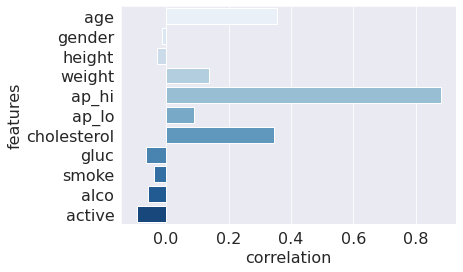

In [290]:
sns.barplot(data=coeff_df, y='features', x='correlation', palette='Blues')

In [302]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test), target_names=['normal', 'saudável'], output_dict=True)
pd.DataFrame(report)

,normal,saudável,accuracy,macro avg,weighted avg
precision,0.704707,0.750623,0.724636,0.727665,0.727340
recall,0.786545,0.660949,0.724636,0.723747,0.724636
f1-score,0.743381,0.702938,0.724636,0.723159,0.723445
support,5158.000000,5014.000000,0.724636,10172.000000,10172.000000


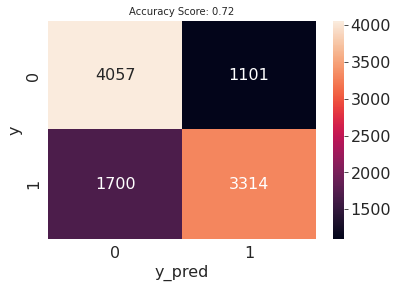

In [305]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

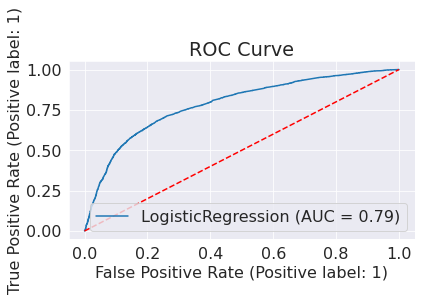

In [322]:
plt.figure(figsize=(10,8))
ax = plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.tight_layout()

**TOP ALGORITMOS DO KAGGLE**

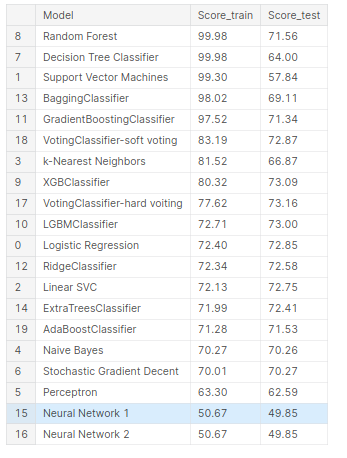